In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras .layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator


In [103]:
df = pd.read_csv('pokemon.csv')
df2 = df.sort_values(by=['Name'], ascending=True).reset_index(drop=True)
df.shape

(809, 3)

In [104]:
type1 = df['Type1'].tolist()
type2 = df['Type2'].tolist()

typo = type1 + type2

In [105]:
df2.head()

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost


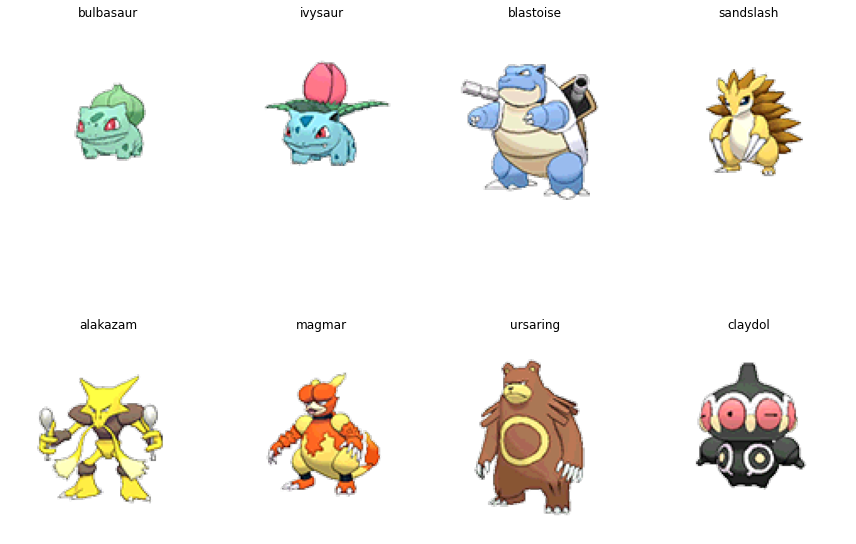

In [106]:
path = 'images/'
fig,((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(8):
    img = mpimg.imread(path+df['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(df['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()
    

In [107]:
import os
path='images/'
img_name = sorted(os.listdir('images/'))
img_paths = []
for i in img_name:
    img_paths.append(path + i)

In [108]:
df2['filepath'] = img_paths

In [109]:
# type 1 ve type2 iki için ikisi içinde ayrı frameler

type = []
code = []
for i in range(df2.shape[0]):
    if (df2.iloc[i]['Type1']=='Grass') :
        type.append('Grass')
        code.append(1)
    elif (df2.iloc[i]['Type1']=='Water'):
        type.append('Water')
        code.append(2)
    elif (df2.iloc[i]['Type1']=='Fire'):
        type.append('Fire')
        code.append(3)
    else:
        type.append('NaN')
        code.append('NaN')
df2['type'] = type
df2['code'] = code
type1 = df2.drop(['Type1', 'Type2', 'Name'], axis=1)
type1 = df2[df2['type']!='NaN']
type1.reset_index(drop=True, inplace=True)
type1.head(n=50)

,Name,Type1,Type2,filepath,type,code
0,abomasnow,Grass,Ice,images/abomasnow.png,Grass,1
1,alomomola,Water,NaN,images/alomomola.png,Water,2
2,amoonguss,Grass,Poison,images/amoonguss.png,Grass,1
3,araquanid,Water,Bug,images/araquanid.jpg,Water,2
4,arcanine,Fire,NaN,images/arcanine.png,Fire,3
5,azumarill,Water,Fairy,images/azumarill.png,Water,2
6,barboach,Water,Ground,images/barboach.png,Water,2
7,basculin-red-striped,Water,NaN,images/basculin-red-striped.png,Water,2
8,bayleef,Grass,NaN,images/bayleef.png,Grass,1
9,bellossom,Grass,NaN,images/bellossom.png,Grass,1


In [115]:
type = []
code = []
for i in range(df2.shape[0]):
    if (df2.iloc[i]['Type2']=='Grass') :
        type.append('Grass')
        code.append(1)
    elif (df2.iloc[i]['Type2']=='Water'):
        type.append('Water')
        code.append(2)
    elif (df2.iloc[i]['Type2']=='Fire'):
        type.append('Fire')
        code.append(3)
    else:
        type.append('NaN')
        code.append('NaN')
df2['type'] = type
df2['code'] = code
type2 = df2.drop(['Type1', 'Type2', 'Name'], axis=1)
type2 = df2[df2['type']!='NaN']
type2.reset_index(drop=True, inplace=True)
type1

,Name,Type1,Type2,filepath,type,code
0,abomasnow,Grass,Ice,images/abomasnow.png,Grass,1
1,alomomola,Water,NaN,images/alomomola.png,Water,2
2,amoonguss,Grass,Poison,images/amoonguss.png,Grass,1
3,araquanid,Water,Bug,images/araquanid.jpg,Water,2
4,arcanine,Fire,NaN,images/arcanine.png,Fire,3
...,...,...,...,...,...,...
240,whimsicott,Grass,Fairy,images/whimsicott.png,Grass,1
241,whiscash,Water,Ground,images/whiscash.png,Water,2
242,wingull,Water,Flying,images/wingull.png,Water,2
243,wishiwashi-solo,Water,NaN,images/wishiwashi-solo.jpg,Water,2


In [111]:
train_datagen_type1 = ImageDataGenerator(
    
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1
)
train_generator_type1 = train_datagen_type1.flow_from_dataframe(
    type1, 
    x_col='filepath', y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator_type1 = train_datagen_type1.flow_from_dataframe(
    type1 , x_col='filepath', y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
train_datagen_type2 = ImageDataGenerator(
    
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1
)
train_generator_type2 = train_datagen_type2.flow_from_dataframe(
    type2, 
    x_col='filepath', y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator_type2 = train_datagen_type2.flow_from_dataframe(
    type2 , x_col='filepath', y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)


Found 221 validated image filenames belonging to 3 classes.
Found 24 validated image filenames belonging to 3 classes.
Found 43 validated image filenames belonging to 3 classes.
Found 4 validated image filenames belonging to 3 classes.


In [112]:
model = Sequential()

model.add(Dense(4, input_shape=(120, 120, 4)))

model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(2, 2))


model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(2, 2))


model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])


In [114]:
"""history = model.fit(
    train_generator_type1, 
    validation_data=validation_generator_type1,
    batch_size=20, 
    epochs=30
)"""

'history = model.fit(\n    train_generator_type1, \n    validation_data=validation_generator_type1,\n    batch_size=20, \n    epochs=30\n)'